In [2]:
import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')


In [3]:
combined = pd.read_csv("output/5_combined.csv")
combined = combined[combined["report_year"] > 2002]
combined.head()

,City,report_year,FTE Count,EDSIGHT_ENROLLMENT,Teacher FTE Count,Counselor FTE Count,has_nulls,Education spending,Inter_Gov_Rev,Enrollment,Grant Payments,wealth_rank
1,ANDOVER,2003,62.2,NaN,23.6,NaN,True,NaN,NaN,NaN,NaN,108.0
2,ANDOVER,2004,62.2,NaN,23.8,NaN,True,NaN,NaN,NaN,NaN,108.0
3,ANDOVER,2005,60.6,NaN,25.8,NaN,True,NaN,NaN,NaN,NaN,108.0
4,ANDOVER,2006,59.6,NaN,24.8,NaN,True,NaN,NaN,NaN,NaN,108.0
5,ANDOVER,2007,60.9,NaN,23.8,NaN,True,7507964.0,2438728.0,645.4,NaN,108.0


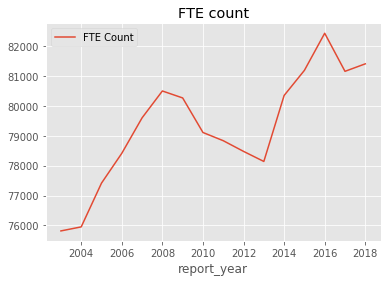

In [4]:
import matplotlib.pyplot as plt
combined = combined[combined["FTE Count"].notnull()]
combined.groupby("report_year").agg({"FTE Count":'sum'}).plot(title="FTE count")
plt.gcf().savefig("figures/for-story/3.1 statewide-fte-count.png")

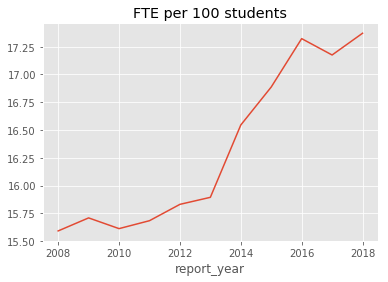

In [5]:
combined_totals = combined.groupby("report_year").agg({"FTE Count":'sum',
                                                       'Counselor FTE Count':'sum',
                                                       'Teacher FTE Count':'sum',
                                                       'Enrollment':'sum',
                                                       'EDSIGHT_ENROLLMENT':'sum'
                                                      })
combined_totals["FTE per 100 students"] = combined_totals["FTE Count"] * 100/ combined_totals["EDSIGHT_ENROLLMENT"]

#combined_totals["FTE per 100 students"] = combined_totals["FTE Count"] * 100/ combined_totals["Enrollment"]
combined_totals["FTE per 100 students"].plot(title="FTE per 100 students")
plt.gcf().savefig("figures/for-story/3.2 statewide-fte-count-adjusted.png")

In [6]:
# combined_totals["Teacher FTE per 100 students"] = combined_totals["Teacher FTE Count"] * 100/ combined_totals["Enrollment"]
# combined_totals["Counselor FTE per 100 students"] = combined_totals["Counselor FTE Count"] * 100/ combined_totals["Enrollment"]


combined_totals["Teacher FTE per 100 students"] = combined_totals["Teacher FTE Count"] * 100/ combined_totals["EDSIGHT_ENROLLMENT"]
combined_totals["Counselor FTE per 100 students"] = combined_totals["Counselor FTE Count"] * 100/ combined_totals["EDSIGHT_ENROLLMENT"]

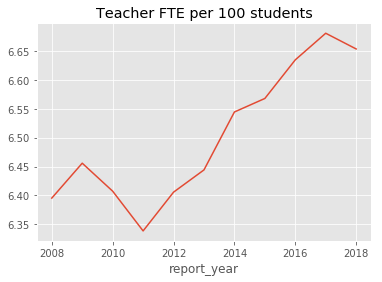

In [7]:
combined_totals["Teacher FTE per 100 students"].plot(title="Teacher FTE per 100 students")
plt.gcf().savefig("figures/for-story/3.3 statewide-teacher-fte-count-adjusted.png")

In [8]:
combined_totals["Teacher FTE per 100 students"]

report_year
2003         inf
2004         inf
2005         inf
2006         inf
2007         inf
2008    6.395409
2009    6.455789
2010    6.407351
2011    6.338607
2012    6.405651
2013    6.444166
2014    6.544394
2015    6.567778
2016    6.634595
2017    6.680635
2018    6.653450
Name: Teacher FTE per 100 students, dtype: float64

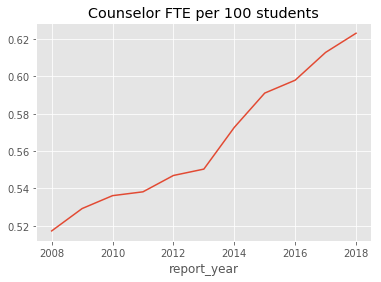

In [7]:
combined_totals["Counselor FTE per 100 students"].plot(title="Counselor FTE per 100 students")
plt.gcf().savefig("figures/for-story/3.4 statewide-counselor-fte-count-adjusted.png")

# Looking for outliers


In [8]:
combined #= combined.set_index(["City", "report_year"])

,City,report_year,FTE Count,EDSIGHT_ENROLLMENT,Teacher FTE Count,Counselor FTE Count,has_nulls,Education spending,Inter_Gov_Rev,Enrollment,Grant Payments,wealth_rank
1,ANDOVER,2003,62.2,NaN,23.6,NaN,True,NaN,NaN,NaN,NaN,108.0
2,ANDOVER,2004,62.2,NaN,23.8,NaN,True,NaN,NaN,NaN,NaN,108.0
3,ANDOVER,2005,60.6,NaN,25.8,NaN,True,NaN,NaN,NaN,NaN,108.0
4,ANDOVER,2006,59.6,NaN,24.8,NaN,True,NaN,NaN,NaN,NaN,108.0
5,ANDOVER,2007,60.9,NaN,23.8,NaN,True,7507964.0,2438728.0,645.40,NaN,108.0
6,ANDOVER,2008,58.0,347.0,25.3,NaN,True,8829049.0,3810247.0,642.14,NaN,108.0
7,ANDOVER,2009,59.4,334.0,25.3,NaN,True,8056856.0,2720551.0,641.76,NaN,108.0
8,ANDOVER,2010,60.0,336.0,26.3,NaN,True,7844581.0,2378006.0,631.35,NaN,108.0
9,ANDOVER,2011,59.7,334.0,26.3,NaN,True,8009858.0,2431822.0,636.48,NaN,108.0
10,ANDOVER,2012,57.6,314.0,25.2,NaN,True,8408601.0,2835725.0,608.16,NaN,108.0


In [9]:
def adjust(df, col, adjust_col="Enrollment"):
    
    ret = df.copy()
    
    return ret[col] / ret[adjust_col]

combined["fte_per_student"] = adjust(combined,"FTE Count")
combined["teachers_per_student"] = adjust(combined,"Teacher FTE Count")
combined["counselors_per_student"] = adjust(combined,"Counselor FTE Count")
combined.head()

,City,report_year,FTE Count,EDSIGHT_ENROLLMENT,Teacher FTE Count,Counselor FTE Count,has_nulls,Education spending,Inter_Gov_Rev,Enrollment,Grant Payments,wealth_rank,fte_per_student,teachers_per_student,counselors_per_student
1,ANDOVER,2003,62.2,NaN,23.6,NaN,True,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN
2,ANDOVER,2004,62.2,NaN,23.8,NaN,True,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN
3,ANDOVER,2005,60.6,NaN,25.8,NaN,True,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN
4,ANDOVER,2006,59.6,NaN,24.8,NaN,True,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN
5,ANDOVER,2007,60.9,NaN,23.8,NaN,True,7507964.0,2438728.0,645.4,NaN,108.0,0.09436,0.036876,NaN


In [10]:
combined["fte_per_student_change"] = combined.groupby(level=0)["fte_per_student"].diff()
combined.head()

,City,report_year,FTE Count,EDSIGHT_ENROLLMENT,Teacher FTE Count,Counselor FTE Count,has_nulls,Education spending,Inter_Gov_Rev,Enrollment,Grant Payments,wealth_rank,fte_per_student,teachers_per_student,counselors_per_student,fte_per_student_change
1,ANDOVER,2003,62.2,NaN,23.6,NaN,True,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN,NaN
2,ANDOVER,2004,62.2,NaN,23.8,NaN,True,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN,NaN
3,ANDOVER,2005,60.6,NaN,25.8,NaN,True,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN,NaN
4,ANDOVER,2006,59.6,NaN,24.8,NaN,True,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN,NaN
5,ANDOVER,2007,60.9,NaN,23.8,NaN,True,7507964.0,2438728.0,645.4,NaN,108.0,0.09436,0.036876,NaN,NaN


In [11]:
combined.sort_values(by="fte_per_student_change")

,City,report_year,FTE Count,EDSIGHT_ENROLLMENT,Teacher FTE Count,Counselor FTE Count,has_nulls,Education spending,Inter_Gov_Rev,Enrollment,Grant Payments,wealth_rank,fte_per_student,teachers_per_student,counselors_per_student,fte_per_student_change
1,ANDOVER,2003,62.2,NaN,23.6,NaN,True,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN,NaN
2,ANDOVER,2004,62.2,NaN,23.8,NaN,True,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN,NaN
3,ANDOVER,2005,60.6,NaN,25.8,NaN,True,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN,NaN
4,ANDOVER,2006,59.6,NaN,24.8,NaN,True,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN,NaN
5,ANDOVER,2007,60.9,NaN,23.8,NaN,True,7507964.0,2438728.0,645.40,NaN,108.0,0.094360,0.036876,NaN,NaN
6,ANDOVER,2008,58.0,347.0,25.3,NaN,True,8829049.0,3810247.0,642.14,NaN,108.0,0.090323,0.039400,NaN,NaN
7,ANDOVER,2009,59.4,334.0,25.3,NaN,True,8056856.0,2720551.0,641.76,NaN,108.0,0.092558,0.039423,NaN,NaN
8,ANDOVER,2010,60.0,336.0,26.3,NaN,True,7844581.0,2378006.0,631.35,NaN,108.0,0.095034,0.041657,NaN,NaN
9,ANDOVER,2011,59.7,334.0,26.3,NaN,True,8009858.0,2431822.0,636.48,NaN,108.0,0.093797,0.041321,NaN,NaN
10,ANDOVER,2012,57.6,314.0,25.2,NaN,True,8408601.0,2835725.0,608.16,NaN,108.0,0.094712,0.041436,NaN,NaN


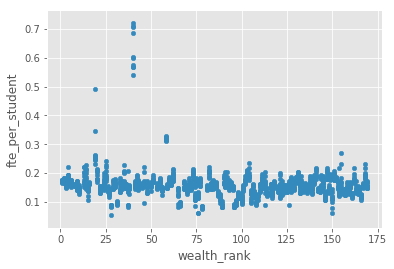

In [12]:
combined.plot.scatter("wealth_rank","fte_per_student")

In [13]:
combined.loc["EASTON"]

KeyError: u'the label [EASTON] is not in the [index]'

In [14]:
combined

,City,report_year,FTE Count,EDSIGHT_ENROLLMENT,Teacher FTE Count,Counselor FTE Count,has_nulls,Education spending,Inter_Gov_Rev,Enrollment,Grant Payments,wealth_rank,fte_per_student,teachers_per_student,counselors_per_student,fte_per_student_change
1,ANDOVER,2003,62.2,NaN,23.6,NaN,True,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN,NaN
2,ANDOVER,2004,62.2,NaN,23.8,NaN,True,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN,NaN
3,ANDOVER,2005,60.6,NaN,25.8,NaN,True,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN,NaN
4,ANDOVER,2006,59.6,NaN,24.8,NaN,True,NaN,NaN,NaN,NaN,108.0,NaN,NaN,NaN,NaN
5,ANDOVER,2007,60.9,NaN,23.8,NaN,True,7507964.0,2438728.0,645.40,NaN,108.0,0.094360,0.036876,NaN,NaN
6,ANDOVER,2008,58.0,347.0,25.3,NaN,True,8829049.0,3810247.0,642.14,NaN,108.0,0.090323,0.039400,NaN,NaN
7,ANDOVER,2009,59.4,334.0,25.3,NaN,True,8056856.0,2720551.0,641.76,NaN,108.0,0.092558,0.039423,NaN,NaN
8,ANDOVER,2010,60.0,336.0,26.3,NaN,True,7844581.0,2378006.0,631.35,NaN,108.0,0.095034,0.041657,NaN,NaN
9,ANDOVER,2011,59.7,334.0,26.3,NaN,True,8009858.0,2431822.0,636.48,NaN,108.0,0.093797,0.041321,NaN,NaN
10,ANDOVER,2012,57.6,314.0,25.2,NaN,True,8408601.0,2835725.0,608.16,NaN,108.0,0.094712,0.041436,NaN,NaN
